<a href="https://colab.research.google.com/github/itskeshavdubey/2022/blob/master/Prediction_of_WHO_Life_Expectancy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your dataset
file_path = '/content/Life Expectancy Data.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the content and structure
print("Dataset Content:")
print(df.head())

print("\nDataset Structure:")
print(df.info())

print("\n\nDataset Columns:")
print(df.columns)

Dataset Content:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Popu

In [3]:
df.shape

(2938, 22)

In [4]:
df.describe

<bound method NDFrame.describe of           Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   

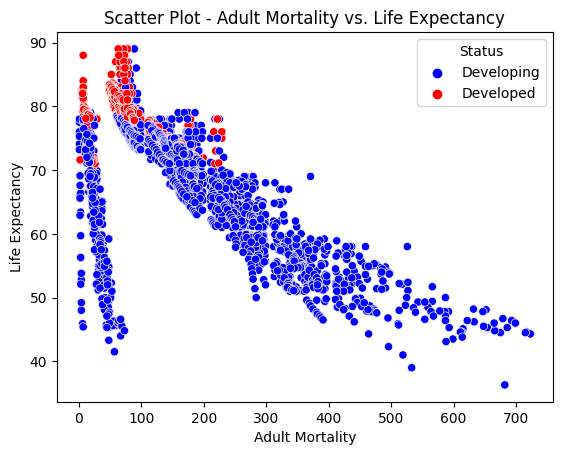

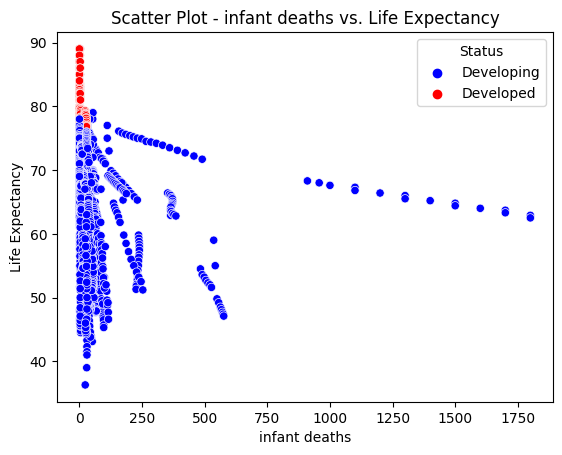

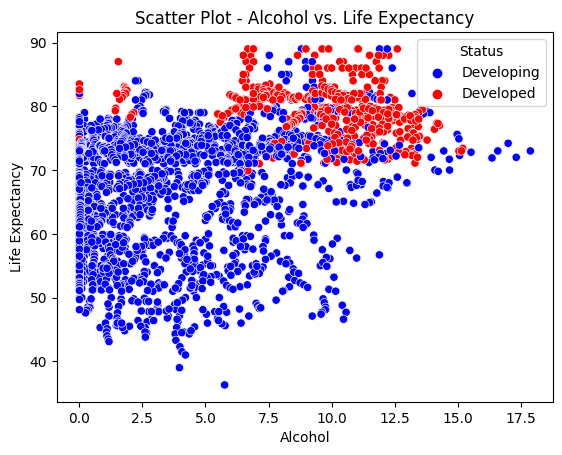

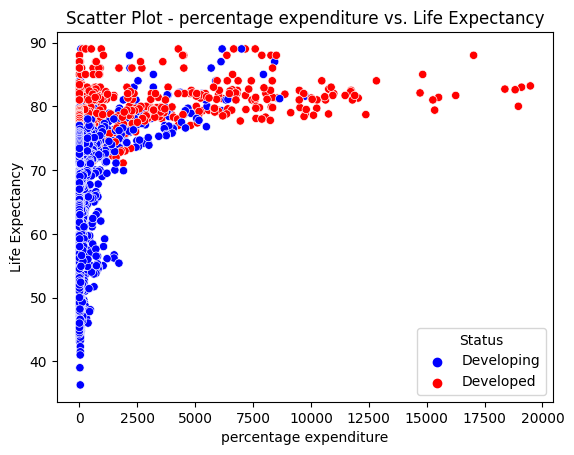

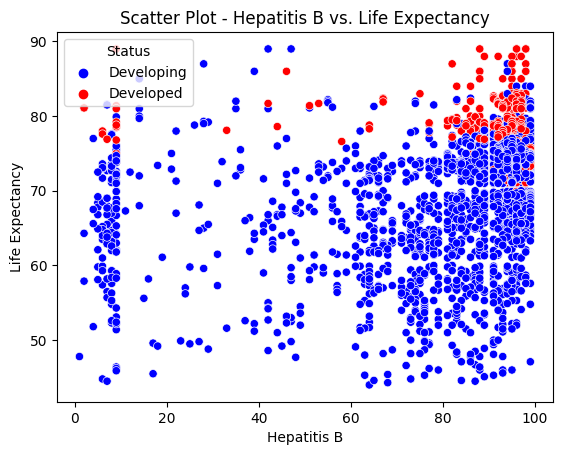

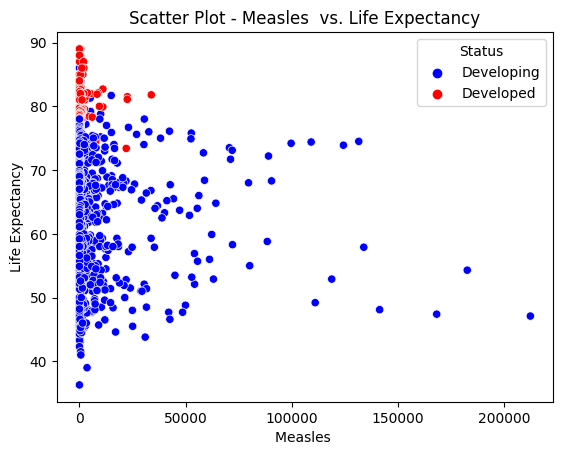

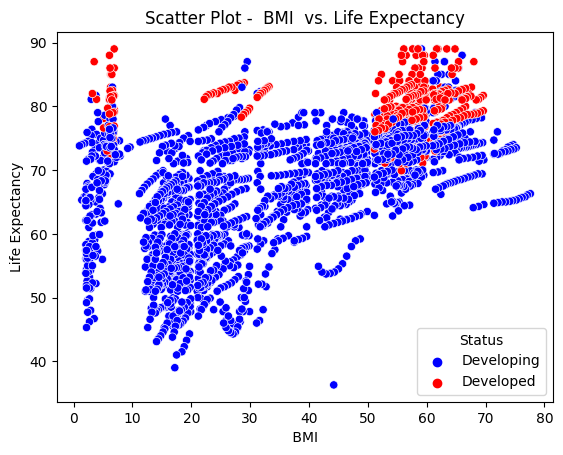

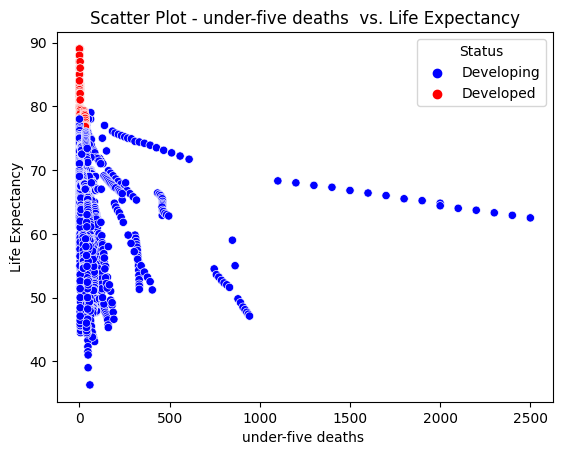

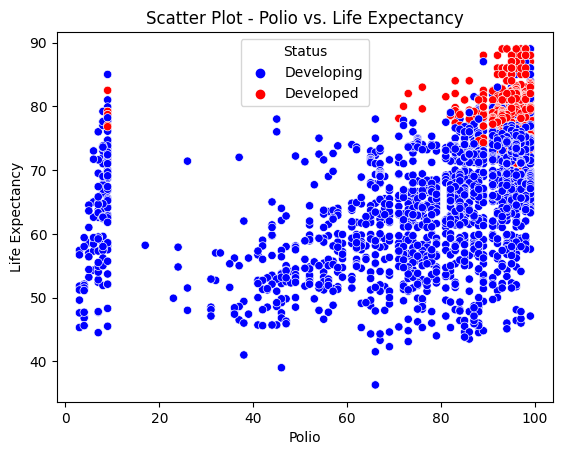

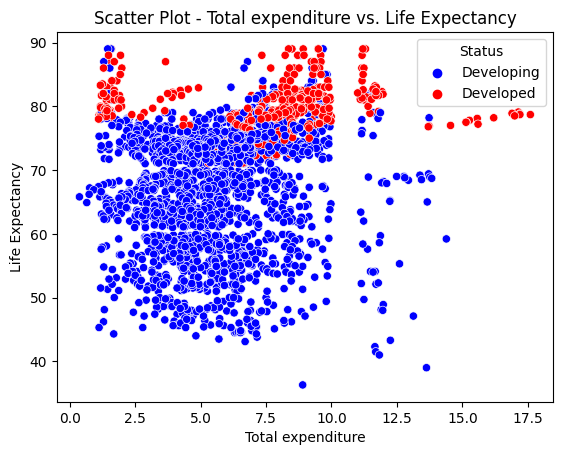

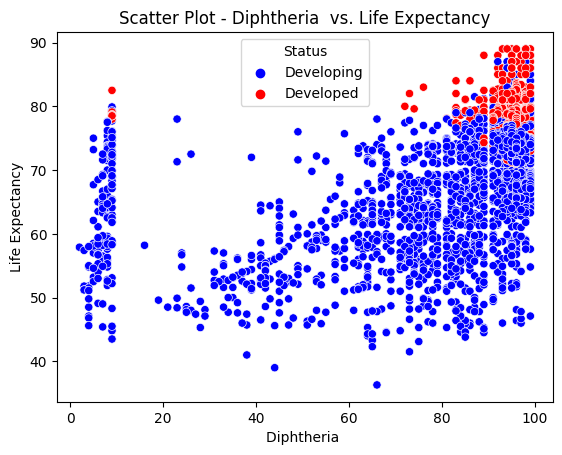

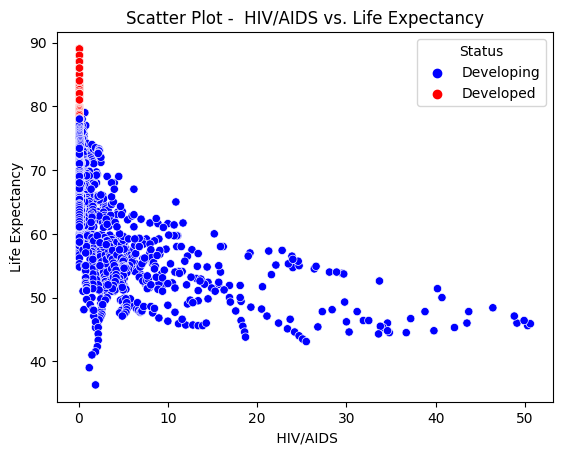

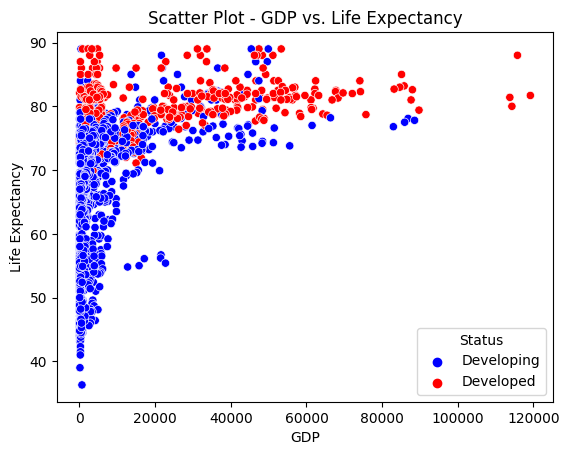

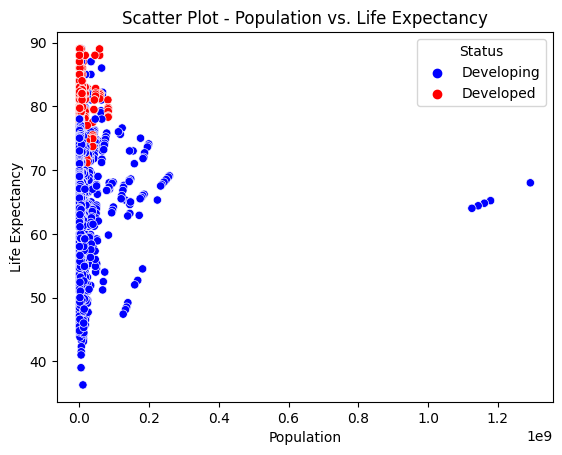

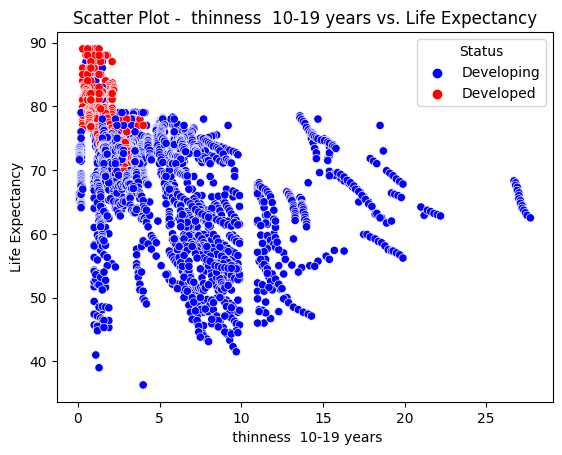

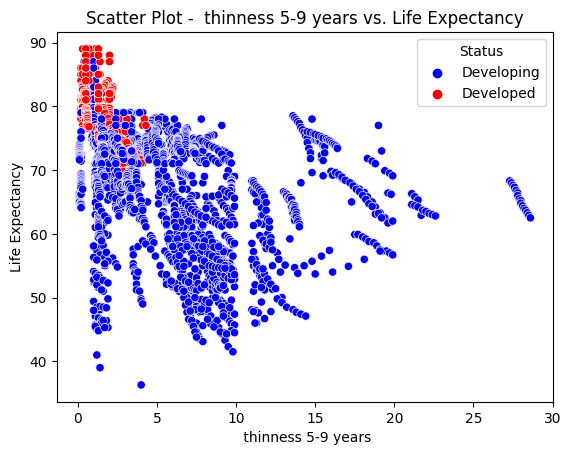

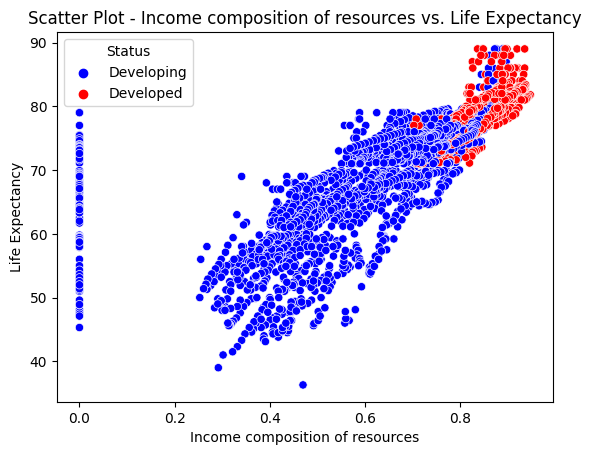

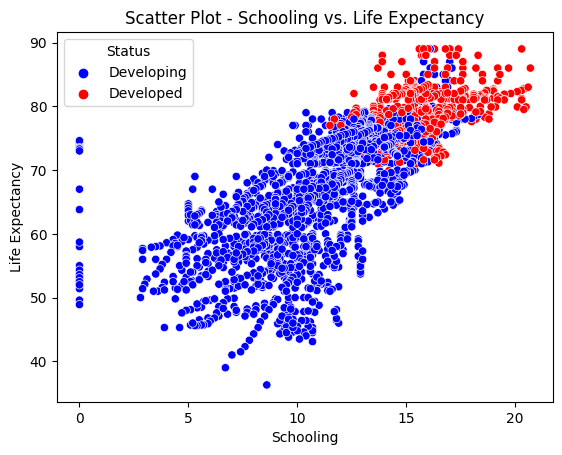

In [5]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

selected_factors = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  10-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Create individual scatter plots for each factor against Life Expectancy
for factor in selected_factors:
    sns.scatterplot(x=factor, y='Life expectancy ', hue='Status', data=df, palette={'Developing': 'blue', 'Developed': 'red'})
    plt.title(f'Scatter Plot - {factor} vs. Life Expectancy')
    plt.xlabel(factor)
    plt.ylabel('Life Expectancy')
    plt.show()

In [6]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  10-19 years              34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Handling missing categorical values with the most common value
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Display the number of missing values after handling them
print("\nNumber of missing values after handling:")
print(df.isnull().sum())


Number of missing values after handling:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  10-19 years             0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


<ipython-input-8-4be52357074e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


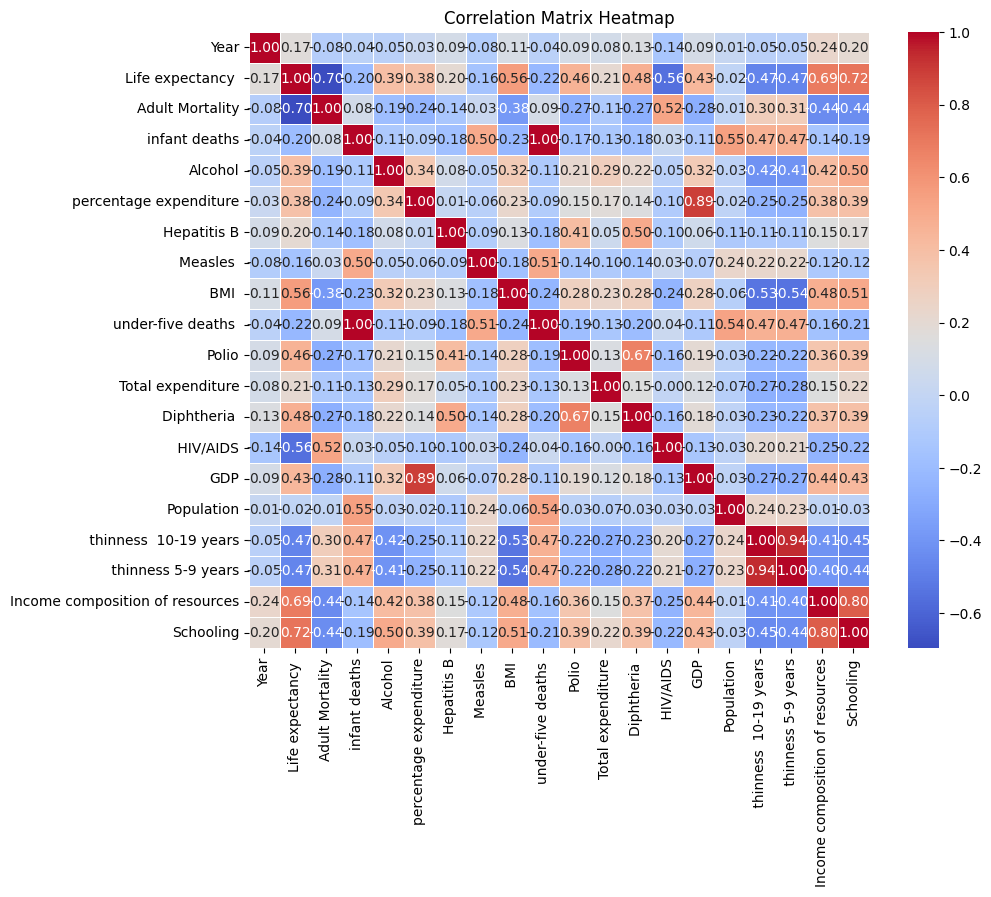

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

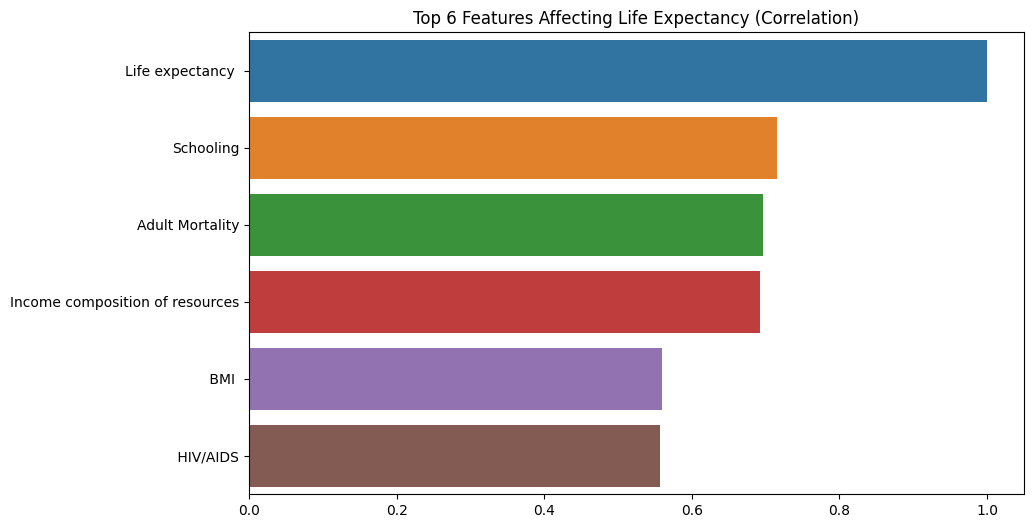

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Life expectancy' as the target variable
# and other features as predictors

# Drop any non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Sort features based on their absolute correlation with 'Life expectancy'
sorted_features = correlation_matrix['Life expectancy '].abs().sort_values(ascending=False)

# Plot the top N features
top_n = 6
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_features.head(top_n).values, y=sorted_features.head(top_n).index)
plt.title(f'Top {top_n} Features Affecting Life Expectancy (Correlation)')
plt.show()


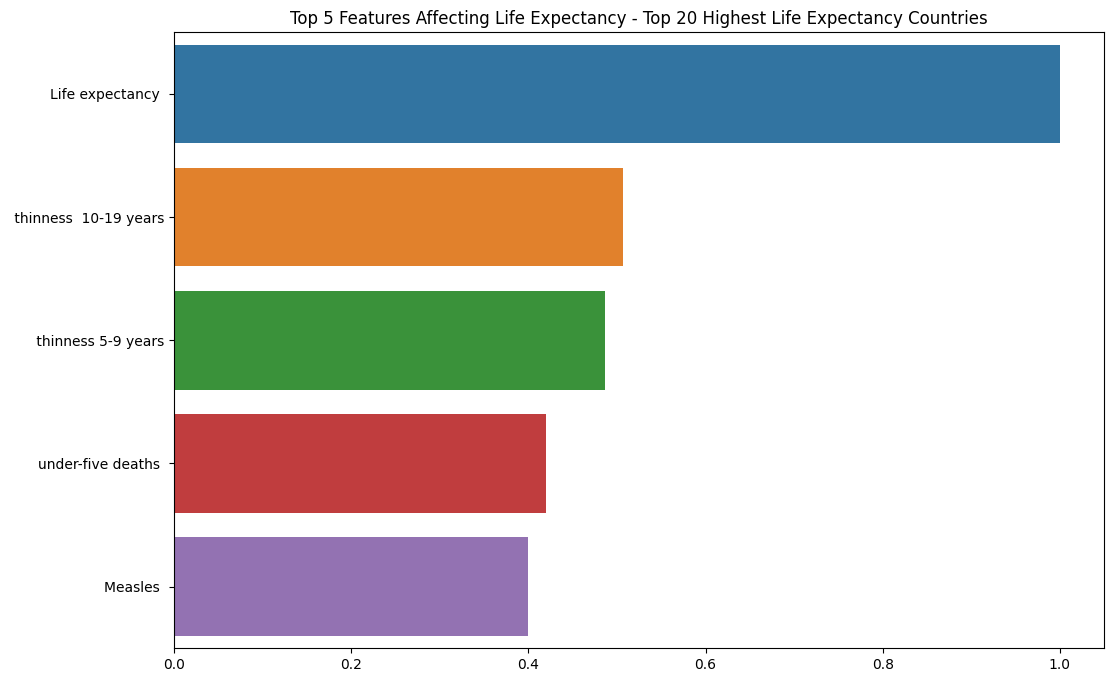

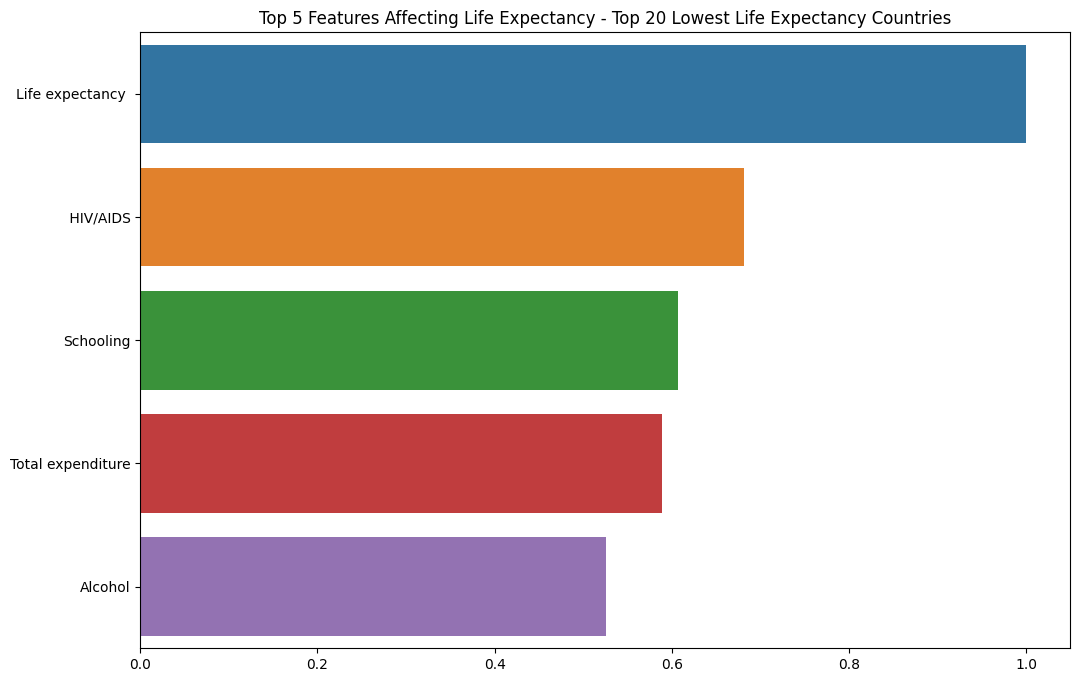

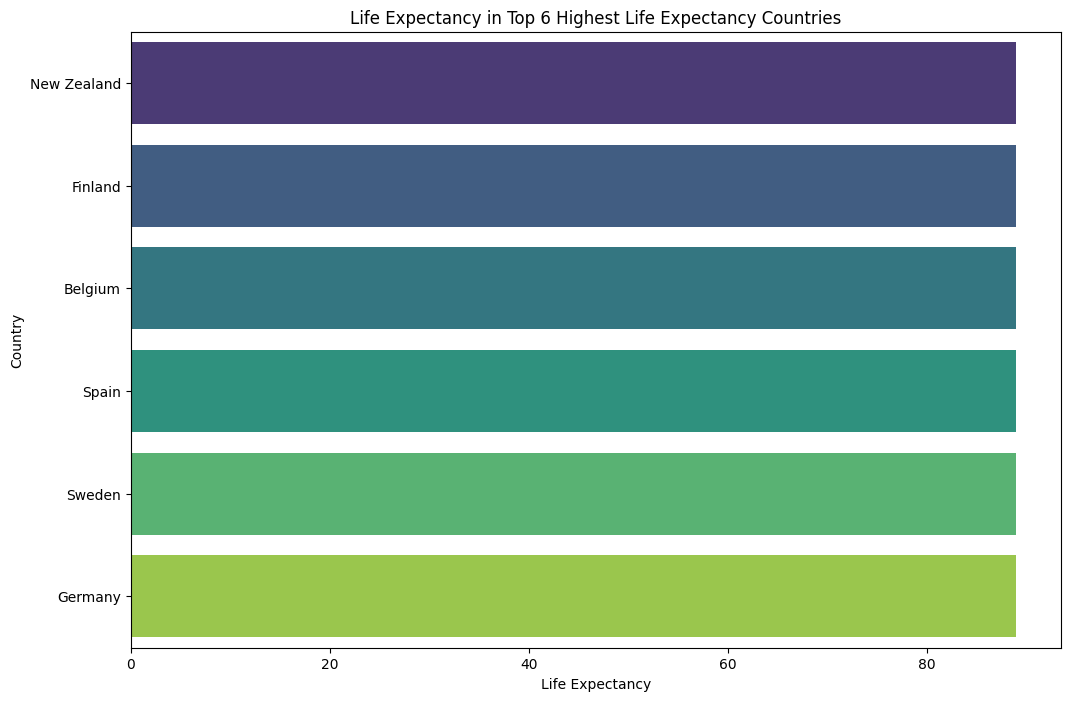

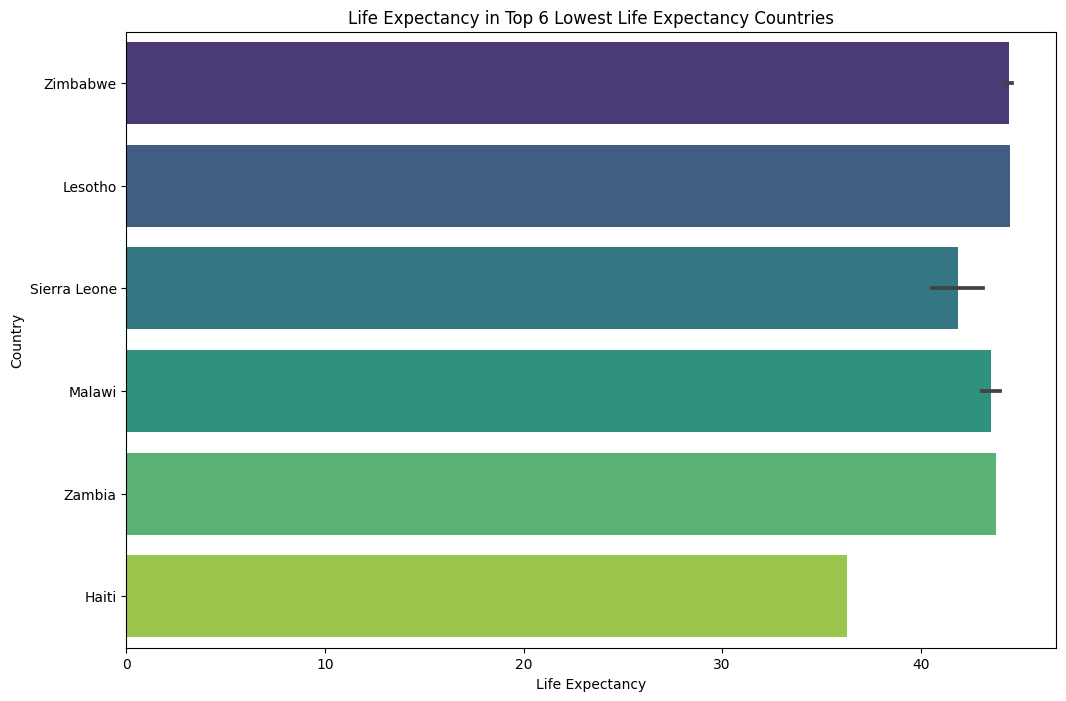

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Life expectancy' as the target variable
# and other features as predictors

# Sort the DataFrame based on 'Life expectancy' in descending order
df_sorted = df.sort_values(by='Life expectancy ', ascending=False)

# Select the top 20 countries with the highest and lowest life expectancies
top_20_highest = df_sorted.head(20)
top_20_lowest = df_sorted.tail(20)


top_6_highests = df_sorted.head(6)
top_6_lowests = df_sorted.tail(15)
# Function to plot the top features affecting life expectancy
def plot_top_features(data, title):
    # Drop any non-numeric columns
    data_numeric = data.select_dtypes(include=['number'])

    # Compute the correlation matrix
    correlation_matrix = data_numeric.corr()

    # Sort features based on their absolute correlation with 'Life expectancy'
    sorted_features = correlation_matrix['Life expectancy '].abs().sort_values(ascending=False)

    # Plot the top 5 features
    top_n = 5
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_features.head(top_n).values, y=sorted_features.head(top_n).index)
    plt.title(f'Top {top_n} Features Affecting Life Expectancy - {title}')
    plt.show()


def plot_countries_life_expectancy(data, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Life expectancy ', y='Country', data=data, palette='viridis')
    plt.title(f'Life Expectancy in {title}')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Country')
    plt.show()


# Plot for the top 20 countries with the highest life expectancies
plot_top_features(top_20_highest, 'Top 20 Highest Life Expectancy Countries')
# Plot for the top 20 countries with the lowest life expectancies
plot_top_features(top_20_lowest, 'Top 20 Lowest Life Expectancy Countries')
plot_countries_life_expectancy(top_6_highests, 'Top 6 Highest Life Expectancy Countries')
# Plot for the top 20 countries with the lowest life expectancies
plot_countries_life_expectancy(top_6_lowests, 'Top 6 Lowest Life Expectancy Countries')

In [11]:
df = df.drop(['infant deaths', 'percentage expenditure', ' thinness 5-9 years'], axis=1)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5


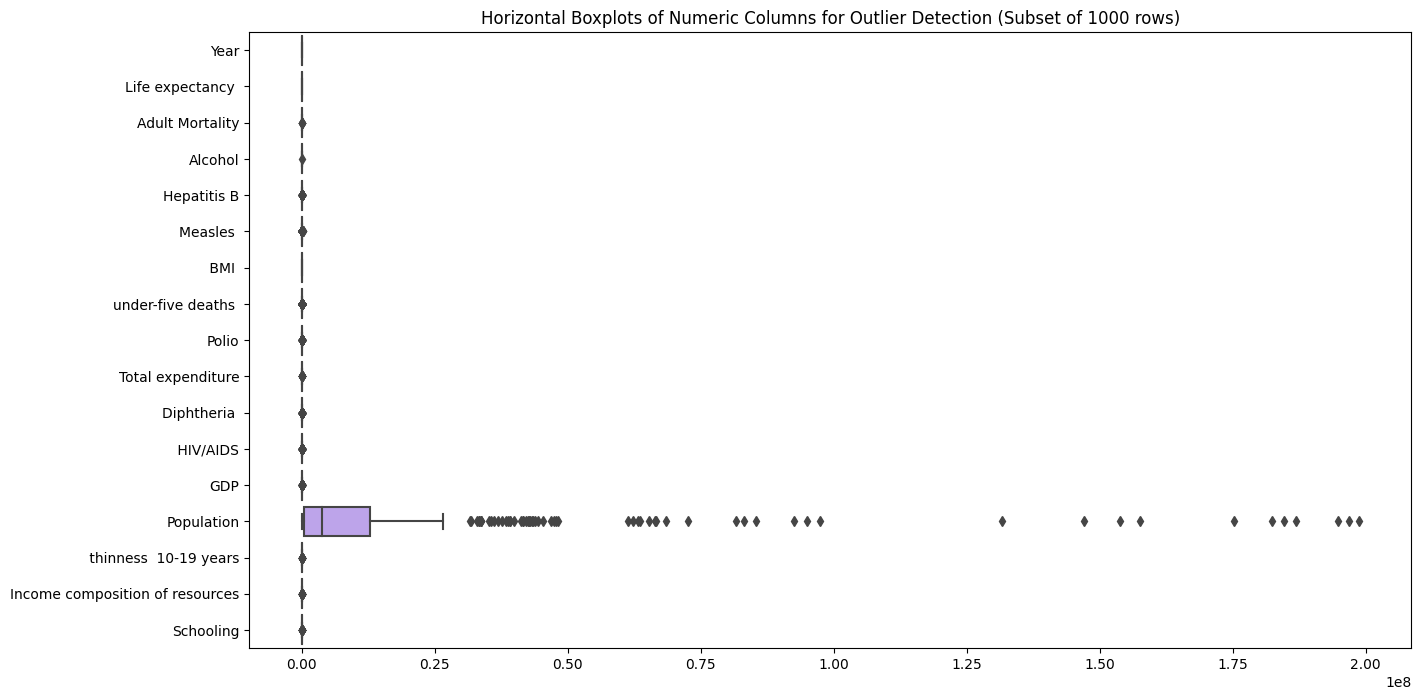

Shape before removing outliers: (2938, 19)
Shape after removing outliers: (1283, 19)


In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

subset_size = 1000
subset_data = df.head(subset_size)

plt.figure(figsize=(15, 8))
sns.boxplot(data=subset_data[numeric_columns], orient='h')
plt.title(f'Horizontal Boxplots of Numeric Columns for Outlier Detection (Subset of {subset_size} rows)')
plt.show()

# Identify and remove outliers using the IQR method on the entire dataset
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
dfnew = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape before and after removing outliers
print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {dfnew.shape}')

In [15]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  10-19 years             0
Income composition of resources    0
Schooling                          0
dtype: int64


In [14]:
print(df.shape)

print(dfnew.shape)

(2938, 19)
(1283, 19)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor

# Assuming you have already defined and loaded your dataframe 'df'

x = df.drop(['Life expectancy ', 'Country', 'Status'], axis=1)
y = df['Life expectancy ']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=5, max_depth=15, min_samples_split=10, max_samples=500, max_features=15)
RFR.fit(X_train, y_train)

# DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=15, min_samples_split=10, max_features=15)
DTR.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, max_features=15, min_samples_split=10)

Training Set Results:
     Metric  Linear Regression  Random Forest  Decision Tree
0       MSE          17.503767       0.575605       1.106685
1       R^2           0.806968       0.993652       0.987795
2       MAE           3.110020       0.527456       0.681396
3  Accuracy           0.111868       0.624027       0.541829

Testing Set Results:
     Metric  Linear Regression  Random Forest  Decision Tree
0       MSE          17.041739       3.895764       6.679324
1       R^2           0.809854       0.956532       0.925474
2       MAE           3.094161       1.268538       1.617120
3  Accuracy           0.103175       0.354875       0.327664


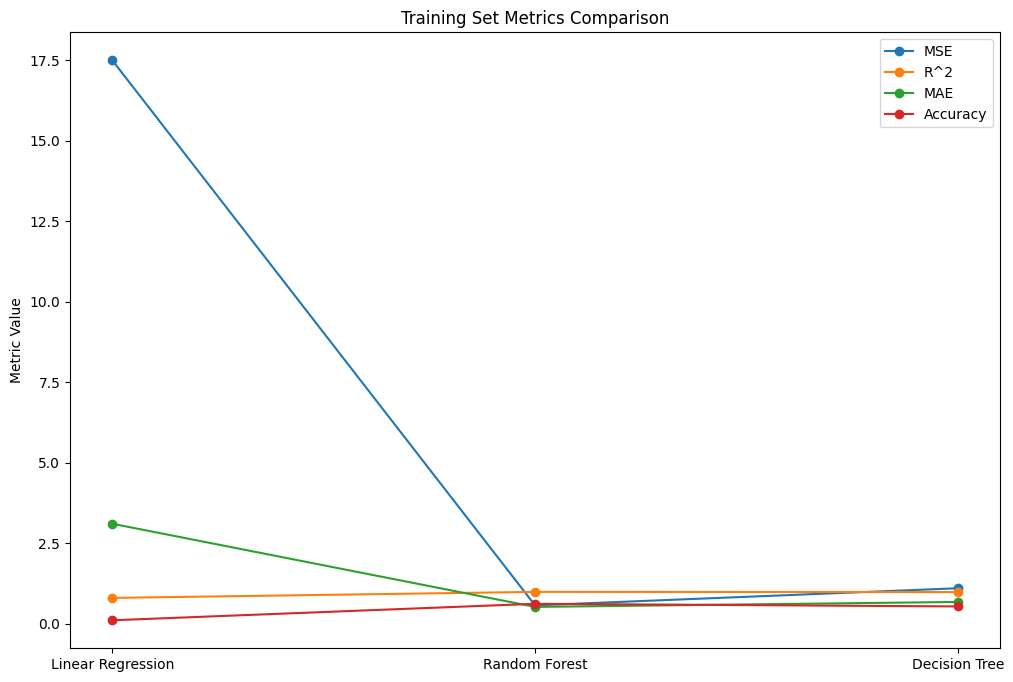

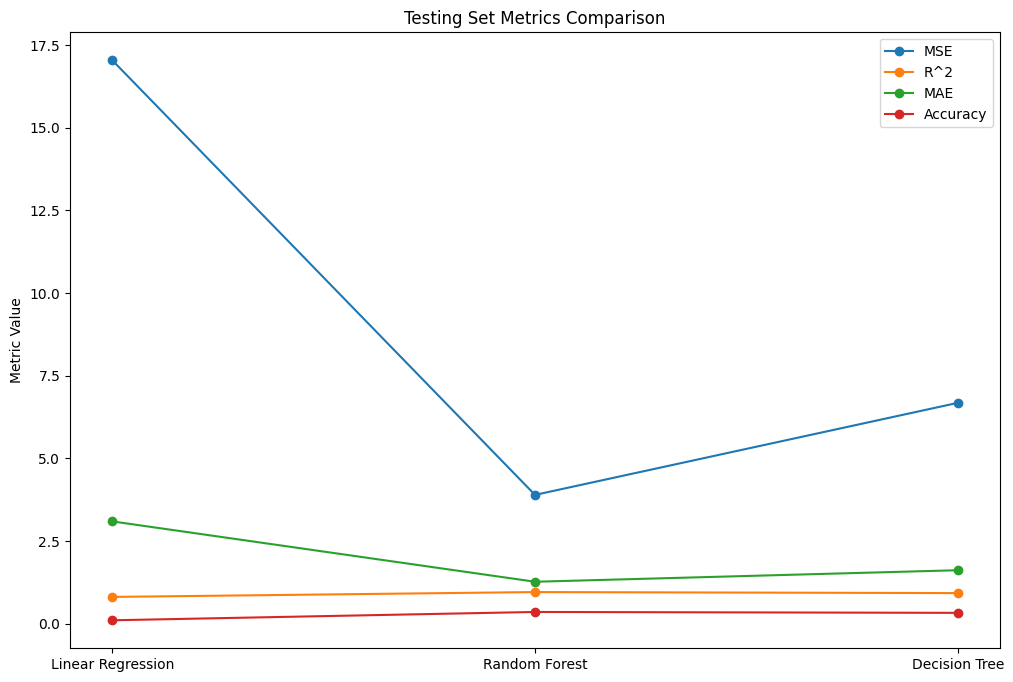

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Assuming you already have predictions for both linear regression and random forest models
# y_train_pred_linear = linear_model.predict(X_train)
# y_train_pred_rf = random_forest_model.predict(X_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor(max_depth=15, min_samples_split=10, max_features=15)
decision_tree_model.fit(X_train, y_train)

y_train_pred_linear = linear_model.predict(X_train).round()
y_train_pred_rf = random_forest_model.predict(X_train).round()
y_train_pred_dt = decision_tree_model.predict(X_train).round()

# Convert the target variables to integers
y_train_rounded = y_train.round()

# Calculate accuracy for training set
accuracy_train_linear = accuracy_score(y_train_rounded, y_train_pred_linear)
accuracy_train_rf = accuracy_score(y_train_rounded, y_train_pred_rf)
accuracy_train_dt = accuracy_score(y_train_rounded, y_train_pred_dt)

# Evaluate performance metrics on the training set
mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
r2_train_linear = r2_score(y_train, y_train_pred_linear)
mae_train_linear = mean_absolute_error(y_train, y_train_pred_linear)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)

mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
r2_train_dt = r2_score(y_train, y_train_pred_dt)
mae_train_dt = mean_absolute_error(y_train, y_train_pred_dt)

# Similarly, calculate metrics for the testing set
y_test_pred_linear = linear_model.predict(X_test).round()
y_test_pred_rf = random_forest_model.predict(X_test).round()
y_test_pred_dt = decision_tree_model.predict(X_test).round()

y_test_rounded = y_test.round()

accuracy_test_linear = accuracy_score(y_test_rounded, y_test_pred_linear)
accuracy_test_rf = accuracy_score(y_test_rounded, y_test_pred_rf)
accuracy_test_dt = accuracy_score(y_test_rounded, y_test_pred_dt)

mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)
mae_test_linear = mean_absolute_error(y_test, y_test_pred_linear)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_test_pred_dt)

# Create DataFrames to store the results
results_train = pd.DataFrame({
    'Metric': ['MSE', 'R^2', 'MAE', 'Accuracy'],
    'Linear Regression': [mse_train_linear, r2_train_linear, mae_train_linear, accuracy_train_linear],
    'Random Forest': [mse_train_rf, r2_train_rf, mae_train_rf, accuracy_train_rf],
    'Decision Tree': [mse_train_dt, r2_train_dt, mae_train_dt, accuracy_train_dt]
})

results_test = pd.DataFrame({
    'Metric': ['MSE', 'R^2', 'MAE', 'Accuracy'],
    'Linear Regression': [mse_test_linear, r2_test_linear, mae_test_linear, accuracy_test_linear],
    'Random Forest': [mse_test_rf, r2_test_rf, mae_test_rf, accuracy_test_rf],
    'Decision Tree': [mse_test_dt, r2_test_dt, mae_test_dt, accuracy_test_dt]
})

# Display the results
print("Training Set Results:")
print(results_train)

print("\nTesting Set Results:")
print(results_test)

# Plotting line charts for Training Set
metrics = ['MSE', 'R^2', 'MAE', 'Accuracy']
plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(results_train.columns[1:], results_train.loc[results_train['Metric'] == metric, results_train.columns[1:]].values.flatten(), marker='o', label=metric)

plt.title('Training Set Metrics Comparison')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# Plotting line charts for Testing Set
plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(results_test.columns[1:], results_test.loc[results_test['Metric'] == metric, results_test.columns[1:]].values.flatten(), marker='o', label=metric)

plt.title('Testing Set Metrics Comparison')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


In [23]:
import pandas as pd

# Assuming you already have predictions for both linear regression and random forest models
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_rf = random_forest_model.predict(X_test)
y_test_pred_dt = decision_tree_model.predict(X_test)

# Create a DataFrame with the predicted and true values
df_results = pd.DataFrame({
    'True Values': y_test.values,  # Assuming y_test is a pandas Series or numpy array
    'Linear Regression Predictions': y_test_pred_linear,
    'Decesion Tree':y_test_pred_dt,
    'Random Forest Predictions': y_test_pred_rf
})


print(df_results.head(20))

    True Values  Linear Regression Predictions  Decesion Tree  \
0          79.4                      79.810123      81.288889   
1          73.1                      68.358434      73.050000   
2          65.2                      67.417317      65.925000   
3          72.9                      79.460852      72.000000   
4          79.0                      72.184257      78.566667   
5          72.3                      70.206362      72.175000   
6          64.1                      63.742902      64.485714   
7          51.4                      52.589266      52.214286   
8          72.6                      72.514371      72.533333   
9          67.0                      65.725920      67.587500   
10         79.3                      77.084705      79.333333   
11         58.7                      62.349434      55.900000   
12         66.5                      67.171876      66.000000   
13         78.7                      79.521578      78.725000   
14         69.9          

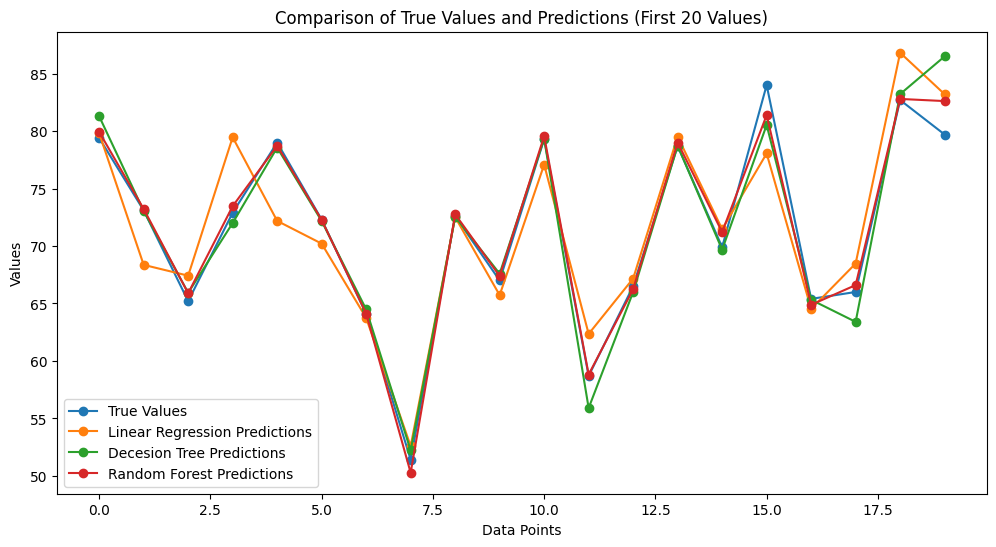

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have predictions for both linear regression and random forest models
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_rf = random_forest_model.predict(X_test)
y_test_pred_dt = decision_tree_model.predict(X_test)
# Plot the line graph
plt.figure(figsize=(12, 6))

plt.plot(df_results.index[:20], df_results['True Values'][:20], label='True Values', marker='o')
plt.plot(df_results.index[:20], df_results['Linear Regression Predictions'][:20], label='Linear Regression Predictions', marker='o')
plt.plot(df_results.index[:20], df_results['Decesion Tree'][:20], label='Decesion Tree Predictions', marker='o')
plt.plot(df_results.index[:20], df_results['Random Forest Predictions'][:20], label='Random Forest Predictions', marker='o')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of True Values and Predictions (First 20 Values)')
plt.legend()
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Columns for input
input_columns = ['Year',
    'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  10-19 years', 'Income composition of resources', 'Schooling'
]

# Initialize an empty dictionary to store user input
user_input = {}

# Get user input for each column
for column in input_columns:
    user_input[column] = float(input(f"Enter value for {column}: "))

# Convert the user input into a DataFrame
user_df = pd.DataFrame([user_input])

# Use the trained models to make predictions on user input
y_pred_linear = linear_model.predict(user_df)
y_pred_rf = random_forest_model.predict(user_df)
y_pred_dt = decision_tree_model.predict(user_df)

# Display the results
print(f"Linear Regression Prediction: {y_pred_linear[0]}")
print(f"Random Forest Prediction: {y_pred_rf[0]}")
print(f"Decesion Train Prediction: {y_pred_dt[0]}")


Enter value for Year: 2030
Enter value for Adult Mortality: 170.5
Enter value for Alcohol: 5.638
Enter value for Hepatitis B: 146.9
Enter value for Measles : 44452
Enter value for  BMI : 30.41
Enter value for under-five deaths : 230
Enter value for Polio: 136.75
Enter value for Total expenditure: 4.5662
Enter value for Diphtheria : 80.91
Enter value for  HIV/AIDS: 0.2008
Enter value for GDP: 1536
Enter value for Population: 357831077
Enter value for  thinness  10-19 years: 25.904
Enter value for Income composition of resources: 0.774
Enter value for Schooling: 15.023
Linear Regression Prediction: 69.97016090544729
Random Forest Prediction: 72.25600000000001
Decesion Train Prediction: 71.4
